This notebook is used to draw accuracy and loss plot from log.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

NUM_ROUND_KEY = 'round_number'
ACCURACY_KEY = 'accuracy'
LOSS_KEY = 'loss'
CLIENT_ID_KEY = 'cid'
NUM_SAMPLES_KEY = 'num_samples'

plt.rcParams['figure.titlesize'] = 40
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20

In [33]:
# print average acc (ICHAR, ICSR)

dataset = 'ICSR'
alg = 'default'

test_acc = []
for test_id in range(10):
    validation_id = (int(test_id) + 9) % 10
    train_ids = list(range(10))
    train_ids.remove(int(test_id))
    train_ids.remove(validation_id)
    # Convert to str
    train_ids = list(map(str, train_ids))
    validation_ids = [str(validation_id)]
    test_ids = [str(test_id)]
    
    experiment_name = f"{dataset}_{alg}_{test_ids}_0"
    log_path = f'./log/{experiment_name}/test.csv'

    data = pd.read_csv(log_path, dtype={'cid': str})
    train_data = data.loc[data['cid'].isin(train_ids)]
    validation_data = data.loc[data['cid'].isin(validation_ids)]
    test_data = data.loc[data['cid'].isin(test_ids)]

    train_avg = train_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
    validation_avg = validation_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
    test_avg = test_data.groupby(NUM_ROUND_KEY, as_index=False).mean()

    test_in_lowest_val = test_avg[validation_avg['loss'] == validation_avg['loss'].min()]
    test_acc.append(test_in_lowest_val.iloc[0]['accuracy'])


print('summary')
print(np.mean(test_acc))
print(np.std(test_acc))
print(test_acc)

summary
0.5707142978906632
0.07627264916611473
[0.3880952298641205, 0.5142857432365417, 0.5904762148857117, 0.6380952596664429, 0.5428571701049805, 0.6785714030265808, 0.5761904716491699, 0.6095238327980042, 0.6190476417541504, 0.550000011920929]


In [291]:
# print average acc (WESAD)

dataset = 'WESAD'
alg = 'mix'

test_acc = []
for test_id in range(15):
    validation_id = (int(test_id) + 14) % 15
    train_ids = list(range(15))
    train_ids.remove(int(test_id))
    train_ids.remove(validation_id)
    # Convert to str
    train_ids = list(map(str, train_ids))
    validation_ids = [str(validation_id)]
    test_ids = [str(test_id)]
    
    experiment_name = f"{dataset}_{alg}_{test_ids}_0"
    log_path = f'./log/{experiment_name}/test.csv'

    data = pd.read_csv(log_path, dtype={'cid': str})
    train_data = data.loc[data['cid'].isin(train_ids)]
    validation_data = data.loc[data['cid'].isin(validation_ids)]
    test_data = data.loc[data['cid'].isin(test_ids)]

    train_avg = train_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
    validation_avg = validation_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
    test_avg = test_data.groupby(NUM_ROUND_KEY, as_index=False).mean()

    test_in_lowest_val = test_avg[validation_avg['loss'] == validation_avg['loss'].min()]
    test_acc.append(test_in_lowest_val.iloc[0]['accuracy'])


print('summary')
print(np.mean(test_acc))
print(np.std(test_acc))
print(test_acc)

summary
0.8535184542338053
0.05798673274751963
[0.8274278044700623, 0.862391471862793, 0.8284379243850708, 0.822311282157898, 0.9326666593551636, 0.7387809753417969, 0.8483221530914307, 0.8546470999717712, 0.7601374387741089, 0.93817937374115, 0.9222519993782043, 0.876518189907074, 0.8615800142288208, 0.8046979904174805, 0.9244264364242554]


In [35]:
# print average acc (HHAR)

dataset = 'HHAR'
alg = 'mix'

test_acc = []
for test_id_u in range(6):
    for test_id_d in range(5):
        validation_id_u = (test_id_u + 5) % 6
        validation_id_d = (test_id_d + 4) % 5
        train_ids_u = list(range(6))
        train_ids_u.remove(test_id_u)
        train_ids_u.remove(validation_id_u)
        train_ids_d = list(range(5))
        train_ids_d.remove(test_id_d)
        train_ids_d.remove(validation_id_d)
        # Convert to str
        train_ids = [f'u{u}_d{d}' for u in train_ids_u for d in train_ids_d]
        validation_ids = [f'u{validation_id_u}_d{validation_id_d}']
        test_ids = [f'u{test_id_u}_d{test_id_d}']

        experiment_name = f"{dataset}_{alg}_{test_ids}_0"
        log_path = f'./log/{experiment_name}/test.csv'

        data = pd.read_csv(log_path, dtype={'cid': str})
        train_data = data.loc[data['cid'].isin(train_ids)]
        validation_data = data.loc[data['cid'].isin(validation_ids)]
        test_data = data.loc[data['cid'].isin(test_ids)]

        train_avg = train_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
        validation_avg = validation_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
        test_avg = test_data.groupby(NUM_ROUND_KEY, as_index=False).mean()

        test_in_lowest_val = test_avg[validation_avg['loss'] == validation_avg['loss'].min()]
        test_acc.append(test_in_lowest_val.iloc[0]['accuracy'])


print('summary')
print(np.mean(test_acc))
print(np.std(test_acc))
print(test_acc)

summary
0.7696147908767065
0.12028046836187536
[0.6626016497612, 0.7939929366111755, 0.8052842020988464, 0.8112788796424866, 0.8586572408676147, 0.65625, 0.7208053469657898, 0.8472106456756592, 0.7343234419822693, 0.8571428656578064, 0.5992646813392639, 0.6451942920684814, 0.6873547434806824, 0.6704963445663452, 0.7980251312255859, 0.9098360538482666, 0.6842696666717529, 0.914787530899048, 0.7902066707611084, 0.8549270033836365, 0.7870967984199524, 0.8302953839302063, 0.8538587689399719, 0.8781198263168335, 0.924957811832428, 0.8461538553237915, 0.3237704932689667, 0.6998695135116577, 0.7943412065505981, 0.8480707406997681]


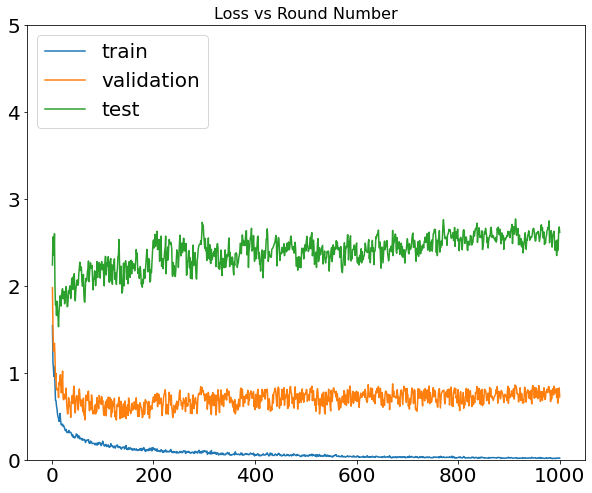

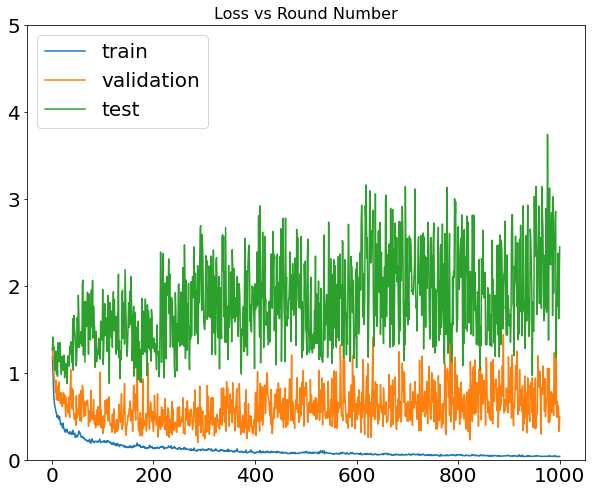

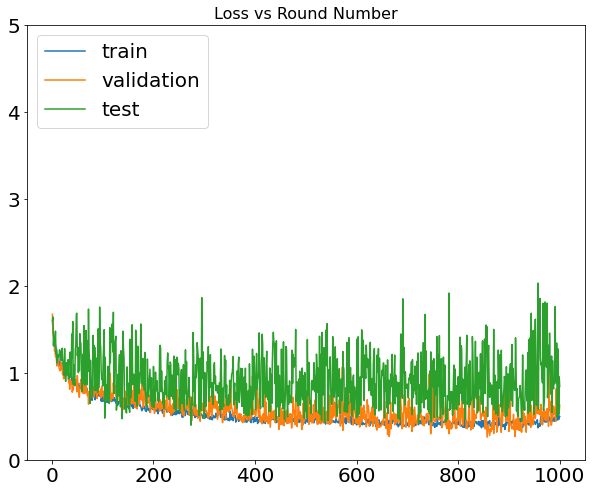

In [4]:
# Plot loss graph of default, meta, and mix (for all dataset)

dataset = 'HHAR'
test_id = 'u0_d0'
gpu_number = 0

if dataset in ['ICHAR', 'ICSR']:
    validation_id = (int(test_id) + 9) % 10
    train_ids = list(range(10))
    train_ids.remove(int(test_id))
    train_ids.remove(validation_id)
    # Convert to str
    train_ids = list(map(str, train_ids))
    validation_ids = [str(validation_id)]
    test_ids = [str(test_id)]
elif dataset in ['WESAD']:
    validation_id = (int(test_id) + 14) % 15
    train_ids = list(range(15))
    train_ids.remove(int(test_id))
    train_ids.remove(validation_id)
    # Convert to str
    train_ids = list(map(str, train_ids))
    validation_ids = [str(validation_id)]
    test_ids = [str(test_id)]
elif dataset in ['HHAR']:
    test_id_u, test_id_d = int(test_id[1]), int(test_id[4])
    validation_id_u = (test_id_u + 5) % 6
    validation_id_d = (test_id_d + 4) % 5
    train_ids_u = list(range(6))
    train_ids_u.remove(test_id_u)
    train_ids_u.remove(validation_id_u)
    train_ids_d = list(range(5))
    train_ids_d.remove(test_id_d)
    train_ids_d.remove(validation_id_d)
    # Convert to str
    train_ids = [f'u{u}_d{d}' for u in train_ids_u for d in train_ids_d]
    validation_ids = [f'u{validation_id_u}_d{validation_id_d}']
    test_ids = [f'u{test_id_u}_d{test_id_d}']

experiment_name = f"{dataset}_default_{test_ids}_0"
log_path = f'./log/{experiment_name}/test.csv'

data = pd.read_csv(log_path, dtype={'cid': str})
train_data = data.loc[data['cid'].isin(train_ids)]
validation_data = data.loc[data['cid'].isin(validation_ids)]
test_data = data.loc[data['cid'].isin(test_ids)]

train_avg = train_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
validation_avg = validation_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
test_avg = test_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
        
plt.figure(figsize=(10, 8))
plt.title(f'Loss vs Round Number', fontsize=16)
plt.plot(train_avg[NUM_ROUND_KEY], train_avg[LOSS_KEY])
plt.plot(validation_avg[NUM_ROUND_KEY], validation_avg[LOSS_KEY])
plt.plot(test_avg[NUM_ROUND_KEY], test_avg[LOSS_KEY])

plt.legend(['train', 'validation', 'test'], loc='upper left')
plt.ylim(0, 5)
plt.show()

###########

experiment_name = f"{dataset}_meta_{test_ids}_0"
log_path = f'./log/{experiment_name}/test.csv'

data = pd.read_csv(log_path, dtype={'cid': str})
train_data = data.loc[data['cid'].isin(train_ids)]
validation_data = data.loc[data['cid'].isin(validation_ids)]
test_data = data.loc[data['cid'].isin(test_ids)]

train_avg = train_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
validation_avg = validation_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
test_avg = test_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
        
plt.figure(figsize=(10, 8))
plt.title(f'Loss vs Round Number', fontsize=16)
plt.plot(train_avg[NUM_ROUND_KEY], train_avg[LOSS_KEY])
plt.plot(validation_avg[NUM_ROUND_KEY], validation_avg[LOSS_KEY])
plt.plot(test_avg[NUM_ROUND_KEY], test_avg[LOSS_KEY])

plt.legend(['train', 'validation', 'test'], loc='upper left')
plt.ylim(0, 5)
plt.show()

###########

experiment_name = f"{dataset}_mix_{test_ids}_0"
log_path = f'./log/{experiment_name}/test.csv'

data = pd.read_csv(log_path, dtype={'cid': str})
train_data = data.loc[data['cid'].isin(train_ids)]
validation_data = data.loc[data['cid'].isin(validation_ids)]
test_data = data.loc[data['cid'].isin(test_ids)]

train_avg = train_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
validation_avg = validation_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
test_avg = test_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
        
plt.figure(figsize=(10, 8))
plt.title(f'Loss vs Round Number', fontsize=16)
plt.plot(train_avg[NUM_ROUND_KEY], train_avg[LOSS_KEY])
plt.plot(validation_avg[NUM_ROUND_KEY], validation_avg[LOSS_KEY])
plt.plot(test_avg[NUM_ROUND_KEY], test_avg[LOSS_KEY])

plt.legend(['train', 'validation', 'test'], loc='upper left')
plt.ylim(0, 5)
plt.show()

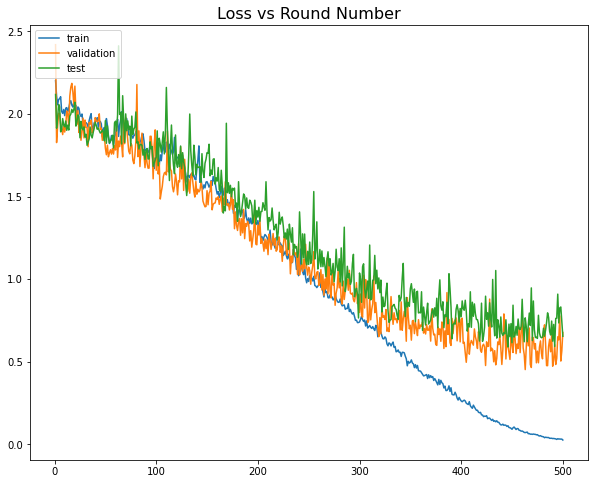

In [66]:
dataset = 'ICSR'
alg = 'whole'
test_id = 7
gpu_number = 0

validation_id = (test_id + 9) % 10
train_id = list(range(10))
train_id.remove(test_id)
train_id.remove(validation_id)

experiment_name = f'{dataset}_{alg}_{test_id}_gpu{gpu_number}'
log_path = f'./log_old/mix_adam_lr10x/{experiment_name}/test.csv'

data = pd.read_csv(log_path)
train_data = data.loc[data['cid'].isin(train_id)]
validation_data = data.loc[data['cid'] == validation_id]
test_data = data.loc[data['cid'] == test_id]

train_avg = train_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
validation_avg = validation_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
test_avg = test_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
        
plt.figure(figsize=(10, 8))
plt.title(f'Loss vs Round Number', fontsize=16)
plt.plot(train_avg[NUM_ROUND_KEY], train_avg[LOSS_KEY])
plt.plot(validation_avg[NUM_ROUND_KEY], validation_avg[LOSS_KEY])
plt.plot(test_avg[NUM_ROUND_KEY], test_avg[LOSS_KEY])

plt.legend(['train', 'validation', 'test'], loc='upper left')
plt.show()

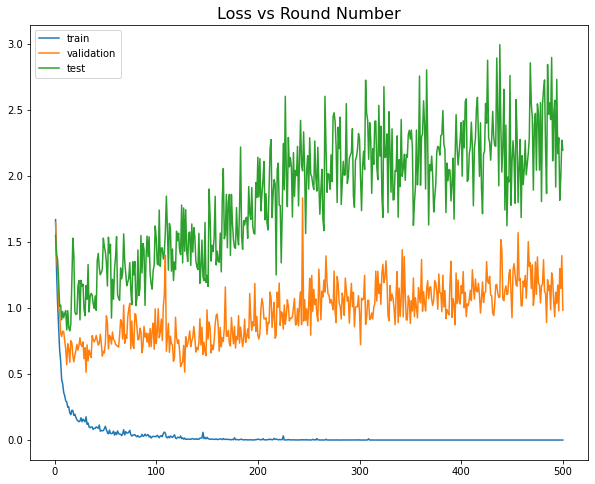

In [67]:
dataset = 'ICSR'
alg = 'meta'
test_id = 7
gpu_number = 0

validation_id = (test_id + 9) % 10
train_id = list(range(10))
train_id.remove(test_id)
train_id.remove(validation_id)

experiment_name = f'{dataset}_{alg}_{test_id}_gpu{gpu_number}'
log_path = f'./log_old/meta_adam_lr10x/{experiment_name}/test.csv'

data = pd.read_csv(log_path)
train_data = data.loc[data['cid'].isin(train_id)]
validation_data = data.loc[data['cid'] == validation_id]
test_data = data.loc[data['cid'] == test_id]

train_avg = train_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
validation_avg = validation_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
test_avg = test_data.groupby(NUM_ROUND_KEY, as_index=False).mean()
        
plt.figure(figsize=(10, 8))
plt.title(f'Loss vs Round Number', fontsize=16)
plt.plot(train_avg[NUM_ROUND_KEY], train_avg[LOSS_KEY])
plt.plot(validation_avg[NUM_ROUND_KEY], validation_avg[LOSS_KEY])
plt.plot(test_avg[NUM_ROUND_KEY], test_avg[LOSS_KEY])

plt.legend(['train', 'validation', 'test'], loc='upper left')
plt.show()